# Observables at background level
## SEoS model and LCDM
### SEoS  BFV for the parameters and Planck 2015 BFVs

Details for SEoS model can be found in  arXiv:1708.08529 
Planck BFV corresponds to the 6th column of Table 4 from the Planck Cosmological Parameters report (2015). 

In [1]:
%pylab inline
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


## Loading the files from class

In [2]:
seospath = './../output/seos/seosPPF_'
lcdmpath = './../output/lcdm/lcdm_'

seos = 'seosbfv_'
planck = 'fullPlanck_'

# Background quantities

In [3]:
#------------------ SEoS --------------------#

seosseos = np.loadtxt(seospath+seos+'background.dat')
seosplanck = np.loadtxt(seospath+planck+'background.dat')


#------------------ LCDM --------------------#

lcdmseos = np.loadtxt(lcdmpath+seos+'background.dat')
lcdmplanck = np.loadtxt(lcdmpath+planck+'background.dat')


In [45]:
z_s_s = seosseos[:,0] 
t_s_s = seosseos[:,1] #proper time [Gyr]
tau_s_s = seosseos[:,2] #conformal time [Mpc]
H_s_s = seosseos[:,3] #[1/Mpc]
comdist_s_s = seosseos[:,4]
ang_dist_s_s = seosseos[:,5]
lum_dist_s_s = seosseos[:,6]
csh_dis_s_s = seosseos[:,7]
# (*-------*)
rhog_s_s = seosseos[:,8]
rhob_s_s = seosseos[:,9]
rhocdm_s_s = seosseos[:,10]
rhode_s_s = seosseos[:,11]
rhour_s_s = seosseos[:,13]
rhocr_s_s = seosseos[:,14]

rhorad_ss = (rhog_s_s+rhour_s_s)/rhocr_s_s
rhomat_ss = (rhocdm_s_s+rhob_s_s)/rhocr_s_s
rhox_ss = rhode_s_s/rhocr_s_s

# (*-------*)
wde_s_s = seosseos[:,12]
# (*-------*)
Dplus_s_s = seosseos[:,15]
fplus_s_s = seosseos[:,16]

In [46]:
z_s_p = seosplanck[:,0] 
t_s_p = seosplanck[:,1] #proper time [Gyr]
tau_s_p = seosplanck[:,2] #conformal time [Mpc]
H_s_p = seosplanck[:,3] #[1/Mpc]
comdist_s_p = seosplanck[:,4]
ang_dist_s_p = seosplanck[:,5]
lum_dist_s_p = seosplanck[:,6]
csh_dis_s_p = seosplanck[:,7]
# (*-------*)
rhog_s_p = seosplanck[:,8]
rhob_s_p = seosplanck[:,9]
rhocdm_s_p = seosplanck[:,10]
rhode_s_p = seosplanck[:,11]
rhour_s_p = seosplanck[:,13]
rhocr_s_p = seosplanck[:,14]

rhorad_sp = (rhog_s_p+rhour_s_p)/rhocr_s_p
rhomat_sp = (rhocdm_s_p+rhob_s_p)/rhocr_s_p
rhox_sp = rhode_s_p/rhocr_s_p

# (*-------*)
wde_s_p = seosplanck[:,12]

Dplus_s_p = seosplanck[:,15]
fplus_s_p = seosplanck[:,16]

In [47]:
z_l_p = lcdmplanck[:,0] 
t_l_p = lcdmplanck[:,1] #proper time [Gyr]
tau_l_p = lcdmplanck[:,2] #conformal time [Mpc]
H_l_p = lcdmplanck[:,3] #[1/Mpc]
comdist_l_p = lcdmplanck[:,4]
ang_dist_l_p = lcdmplanck[:,5]
lum_dist_l_p = lcdmplanck[:,6]
csh_dis_l_p = lcdmplanck[:,7]
# (*-------*)
rhog_l_p = lcdmplanck[:,8]
rhob_l_p = lcdmplanck[:,9]
rhocdm_l_p = lcdmplanck[:,10]
rhode_l_p = lcdmplanck[:,11]
rhour_l_p = lcdmplanck[:,12]
rhocr_l_p = lcdmplanck[:,13]

rhorad_lp = (rhog_l_p+rhour_l_p)/rhocr_l_p
rhomat_lp = (rhocdm_l_p+rhob_l_p)/rhocr_l_p
rhox_lp = rhode_l_p/rhocr_l_p

# (*-------*)
Dplus_l_p = lcdmplanck[:,14]
fplus_l_p = lcdmplanck[:,15]

In [48]:
z_l_s = lcdmseos[:,0] 
t_l_s = lcdmseos[:,1] #proper time [Gyr]
tau_l_s = lcdmseos[:,2] #conformal time [Mpc]
H_l_s = lcdmseos[:,3] #[1/Mpc]
comdist_l_s = lcdmseos[:,4]
ang_dist_l_s = lcdmseos[:,5]
lum_dist_l_s = lcdmseos[:,6]
csh_dis_l_s = lcdmseos[:,7]
# (*-------*)
rhog_l_s = lcdmseos[:,8]
rhob_l_s = lcdmseos[:,9]
rhocdm_l_s = lcdmseos[:,10]
rhode_l_s = lcdmseos[:,11]
rhour_l_s = lcdmseos[:,12]
rhocr_l_s = lcdmseos[:,13]

rhorad_ls = (rhog_l_s+rhour_l_s)/rhocr_l_s
rhomat_ls = (rhocdm_l_s+rhob_l_s)/rhocr_l_s
rhox_ls = rhode_l_s/rhocr_l_s
# (*-------*)
Dplus_l_s = lcdmseos[:,14]
fplus_l_s = lcdmseos[:,15]

In [ ]:
seosseos.shape, seosplanck.shape, lcdmplanck.shape,  lcdmseos.shape

## Interpolating the arrays to make ratios

First we need to know the range of the z-values for each f(z). Then we can use interp1d or splinerep from scipy to interpolate the arrays and create new ones than can be manipulated.

In [8]:
#zarray = np.linspace(1e14, 0, 1000)
zarray = np.logspace(0, 14, 1000)

In [ ]:
#zarray = np.logspace

In [9]:
# Hubble function

Hss_func = interpolate.interp1d(seosseos[:,0], seosseos[:,3], kind=3)
Hsp_func = interpolate.interp1d(seosplanck[:,0], seosplanck[:,3], kind=3)
Hls_func = interpolate.interp1d(lcdmseos[:,0], lcdmseos[:,3], kind=3)
Hlp_func = interpolate.interp1d(lcdmplanck[:,0], lcdmplanck[:,3], kind=3)


Hss_int = Hss_func(zarray)
Hsp_int = Hsp_func(zarray)
Hls_int = Hls_func(zarray)
Hlp_int = Hlp_func(zarray)

In [21]:
# Densities (rho_g, rho_b, rho_cdm, rho_de, rho_ur)
#rho_g
rhogss_func = interpolate.interp1d(seosseos[:,0], seosseos[:,8], kind=3)
rhogsp_func = interpolate.interp1d(seosplanck[:,0], seosplanck[:,8], kind=3)
rhogls_func = interpolate.interp1d(lcdmseos[:,0], lcdmseos[:,8], kind=3)
rhoglp_func = interpolate.interp1d(lcdmplanck[:,0], lcdmplanck[:,8], kind=3)

rhogss_int = rhogss_func(zarray)
rhogsp_int = rhogsp_func(zarray)
rhogls_int = rhogls_func(zarray)
rhoglp_int = rhoglp_func(zarray)

#rho_b
rhobss_func = interpolate.interp1d(seosseos[:,0], seosseos[:,9], kind=3)
rhobsp_func = interpolate.interp1d(seosplanck[:,0], seosplanck[:,9], kind=3)
rhobls_func = interpolate.interp1d(lcdmseos[:,0], lcdmseos[:,9], kind=3)
rhoblp_func = interpolate.interp1d(lcdmplanck[:,0], lcdmplanck[:,9], kind=3)

rhobss_int = rhobss_func(zarray)
rhobsp_int = rhobsp_func(zarray)
rhobls_int = rhobls_func(zarray)
rhoblp_int = rhoblp_func(zarray)

#rho_cdm
rhocss_func = interpolate.interp1d(seosseos[:,0], seosseos[:,10], kind=3)
rhocsp_func = interpolate.interp1d(seosplanck[:,0], seosplanck[:,10], kind=3)
rhocls_func = interpolate.interp1d(lcdmseos[:,0], lcdmseos[:,10], kind=3)
rhoclp_func = interpolate.interp1d(lcdmplanck[:,0], lcdmplanck[:,10], kind=3)

rhocss_int = rhocss_func(zarray)
rhocsp_int = rhocsp_func(zarray)
rhocls_int = rhocls_func(zarray)
rhoclp_int = rhoclp_func(zarray)

#rho_x (either Lambda or DE fluid)
rhoxss_func = interpolate.interp1d(seosseos[:,0], seosseos[:,11], kind=3)
rhoxsp_func = interpolate.interp1d(seosplanck[:,0], seosplanck[:,11], kind=3)
rhoxls_func = interpolate.interp1d(lcdmseos[:,0], lcdmseos[:,11], kind=3)
rhoxlp_func = interpolate.interp1d(lcdmplanck[:,0], lcdmplanck[:,11], kind=3)

rhoxss_int = rhoxss_func(zarray)
rhoxsp_int = rhoxsp_func(zarray)
rhoxls_int = rhoxls_func(zarray)
rhoxlp_int = rhoxlp_func(zarray)

#w_x (for DE fluid)
wxss_func = interpolate.interp1d(seosseos[:,0], seosseos[:,12], kind=3)
wxsp_func = interpolate.interp1d(seosplanck[:,0], seosplanck[:,12], kind=3)

wxss_int = wxss_func(zarray)
wxsp_int = wxsp_func(zarray)

#rho_cr
rhocrss_func = interpolate.interp1d(seosseos[:,0], seosseos[:,14], kind=3)
rhocrsp_func = interpolate.interp1d(seosplanck[:,0], seosplanck[:,14], kind=3)
rhocrls_func = interpolate.interp1d(lcdmseos[:,0], lcdmseos[:,13], kind=3)
rhocrlp_func = interpolate.interp1d(lcdmplanck[:,0], lcdmplanck[:,13], kind=3)

rhocrss_int = rhocrss_func(zarray)
rhocrsp_int = rhocrsp_func(zarray)
rhocrls_int = rhocrls_func(zarray)
rhocrlp_int = rhocrlp_func(zarray)

## Figures

In [11]:
class FancyFormatter(Formatter):
    '''Formatter for values with LaTeX fonts'''
    
    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)
    
    def format_data_short(self, value):
        return '{:.1f}'.format(value)


In [12]:
label_l = r'$\Lambda CDM$'
label_s = r'SEoS'
ls_l = '--'
ls_s = ':'
figspath = './../figs/'

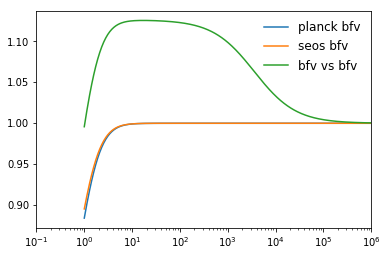

In [18]:
plot(zarray, Hsp_int/Hlp_int, label=r'planck bfv')
plot(zarray, Hss_int/Hls_int, label=r'seos bfv')
plot(zarray, Hss_int/Hlp_int, label=r'bfv vs bfv')
legend(loc='best', frameon=False, prop={'size':12})
xlim(0.1,10e5)
xscale('log')
#plot(zarray, H_l_p)
#plot(z_s_s, H_s_s)
#plot(z_s_p, H_s_p)

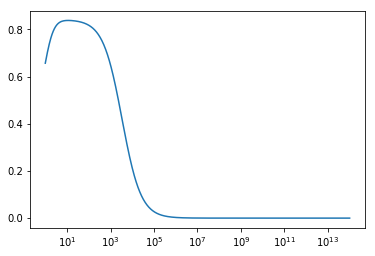

In [23]:
plot(zarray, rhoclp_int/rhocrlp_int)
xscale('log')

In [24]:
aarray = 1 /(1+zarray)

In [28]:
min(aarray), max(aarray)

(9.9999999999999e-15, 0.5)

In [53]:
#rhomatter_lp =(rhoclp_int+rhoblp_int)/rhocrlp_int
#rhorad_lp = rhoglp_int/rhocrlp_int
#rholambda_lp = rhoxlp_int/rhocrlp_int

Text(0.5,0,u'a(t)')

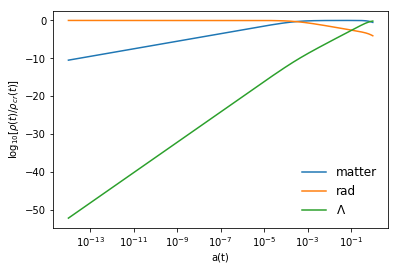

In [71]:
plot(1/(lcdmplanck[:,0]+1), log10(rhomat_lp), label = r'matter')
plot(1/(lcdmplanck[:,0]+1), log10(rhorad_lp), label = r'rad')
plot(1/(lcdmplanck[:,0]+1), log10(rhox_lp), label = r'$\Lambda$')
legend(loc='best', frameon=False, prop={'size':12})

xscale('log')
ylabel(r'$\log_{10}\left[\rho(t)/\rho_{cr}(t)\right]$')
xlabel(r'a(t)')

In [63]:
a_lp = 1/(1+lcdmplanck[:,0]);
a_lp[-1]

1.0

In [67]:
rhocr_l_p, (rhocdm_l_p+rhob_l_p)

(array([4.65500451e+44, 4.52691379e+44, 4.40234771e+44, ...,
        5.17135133e-08, 5.13728499e-08, 5.10562577e-08]),
 array([1.56994923e+34, 1.53743653e+34, 1.50559715e+34, ...,
        1.63564863e-08, 1.60159589e-08, 1.56994923e-08]))

In [163]:
rhocr0_lp = rhocr_l_p[-1]
rhocr0_ls = rhocr_l_s[-1]
rhocr0_ss = rhocr_s_s[-1]
rhocr0_sp = rhocr_s_p[-1]

Text(0.5,0,u'a(t)')

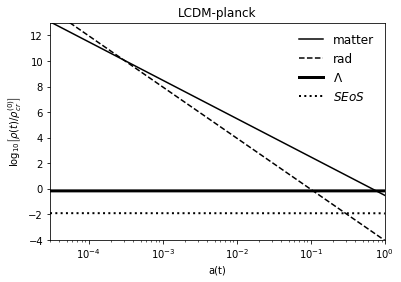

In [164]:
plot(1/(lcdmplanck[:,0]+1), log10((rhocdm_l_p+rhob_l_p)/rhocr0_lp),
     label = r'matter',color='black')
plot(1/(lcdmplanck[:,0]+1), log10((rhog_l_p+rhour_l_p)/rhocr0_lp),
     ls='--',label = r'rad',color='black')
plot(1/(lcdmplanck[:,0]+1), log10(rhode_l_p/rhocr0_lp),
     label = r'$\Lambda$', lw=3,color='black')
plot(1/(seosplanck[:,0]+1), log10(rhode_s_p/rhocr0_sp),
     label = r'$SEoS$', lw=2,color='black', ls=':')
legend(loc='best', frameon=False, prop={'size':12})
title(r'LCDM-planck')
xlim(3e-5,1)
ylim(-4,13)

xscale('log')
ylabel(r'$\log_{10}\left[\rho(t)/\rho_{cr}^{(0)}\right]$')
xlabel(r'a(t)')

Text(0.5,0,u'a(t)')

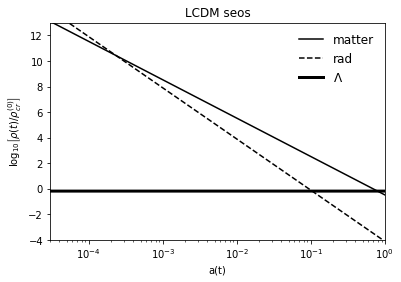

In [90]:
plot(1/(lcdmseos[:,0]+1), log10((rhocdm_l_s+rhob_l_s)/rhocr0_ls),
     label = r'matter',color='black')
plot(1/(lcdmseos[:,0]+1), log10((rhog_l_s+rhour_l_s)/rhocr0_ls),
     ls='--',label = r'rad',color='black')
plot(1/(lcdmseos[:,0]+1), log10(rhode_l_s/rhocr0_ls),
     label = r'$\Lambda$', lw=3,color='black')
legend(loc='best', frameon=False, prop={'size':12})
title(r'LCDM seos')
xlim(3e-5,1)
ylim(-4,13)

xscale('log')
ylabel(r'$\log_{10}\left[\rho(t)/\rho_{cr}^{(0)}\right]$')
xlabel(r'a(t)')

Text(0.5,0,u'a(t)')

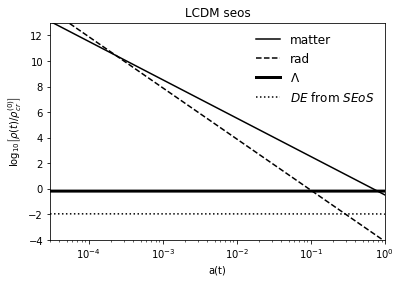

In [150]:
plot(1/(lcdmseos[:,0]+1), log10((rhocdm_l_s+rhob_l_s)/rhocr0_ls),
     label = r'matter',color='black')
plot(1/(lcdmseos[:,0]+1), log10((rhog_l_s+rhour_l_s)/rhocr0_ls),
     ls='--',label = r'rad',color='black')
plot(1/(lcdmseos[:,0]+1), log10(rhode_l_s/rhocr0_ls),
     label = r'$\Lambda$', lw=3,color='black')
plot(1/(seosseos[:,0]+1), log10(rhode_s_s/rhocr0_ss),
     label = r'$DE$ from $SEoS$', ls=':',color='black')
legend(loc='best', frameon=False, prop={'size':12})
title(r'LCDM seos')
xlim(3e-5,1)
ylim(-4,13)

xscale('log')
ylabel(r'$\log_{10}\left[\rho(t)/\rho_{cr}^{(0)}\right]$')
xlabel(r'a(t)')

Text(0.5,0,u'a(t)')

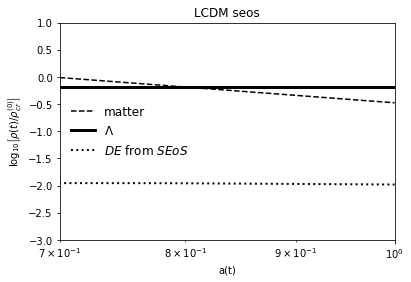

In [145]:
plot(1/(lcdmseos[:,0]+1), log10((rhocdm_l_s+rhob_l_s)/rhocr0_ls),
     label = r'matter',color='black', ls='--')
#plot(1/(lcdmseos[:,0]+1), log10((rhog_l_s+rhour_l_s)/rhocr0_ls),
#     ls='--',label = r'rad',color='black')
plot(1/(lcdmseos[:,0]+1), log10(rhode_l_s/rhocr0_ls),
     label = r'$\Lambda$', lw=3,color='black')
plot(1/(seosseos[:,0]+1), log10(rhode_s_s/rhocr0_ss),
     label = r'$DE$ from $SEoS$', lw=2,color='black', ls=':')

legend(loc='best', frameon=False, prop={'size':12})
title(r'LCDM seos')
xlim(7e-1,1)
ylim(-3,1)

xscale('log')
ylabel(r'$\log_{10}\left[\rho(t)/\rho_{cr}^{(0)}\right]$')
xlabel(r'a(t)')

Text(0.5,0,u'a(t)')

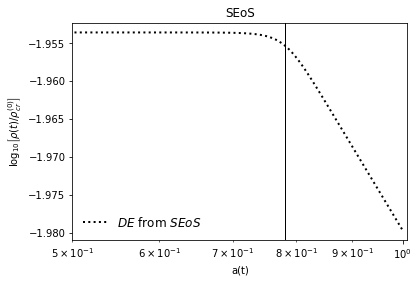

In [162]:
at=1/(1+0.28)
plot(1/(seosseos[:,0]+1), log10(rhode_s_s/rhocr0_ss),
     label = r'$DE$ from $SEoS$', lw=2,color='black', ls=':')
plt.axvline(x=at, color='black', lw=1)

legend(loc='best', frameon=False, prop={'size':12})
title(r'SEoS')
xlim(5e-1,1.01)
#ylim(-3,1)

xscale('log')
ylabel(r'$\log_{10}\left[\rho(t)/\rho_{cr}^{(0)}\right]$')
xlabel(r'a(t)')

In [120]:
H0seos = 73.22 #SEoS 
H0planck = 67.74 #LCDM
comdist_s_s = seosseos[:,4]
ang_dist_s_s = seosseos[:,5]
lum_dist_s_s = seosseos[:,6]

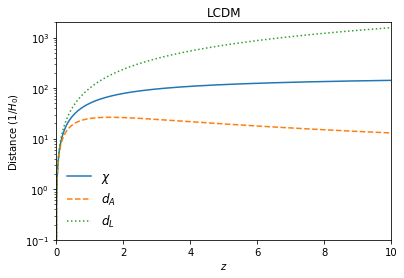

In [130]:
plot(lcdmplanck[:,0],lcdmplanck[:,4]/H0planck, label=r'$\chi$')
plot(lcdmplanck[:,0],lcdmplanck[:,5]/H0planck, ls='--', label=r'$d_A$')
plot(lcdmplanck[:,0],lcdmplanck[:,6]/H0planck, ls=':',label=r'$d_L$')
title(r'LCDM')

legend(loc='best', frameon=False, prop={'size':12})
ylabel(r'Distance $(1/H_0)$')
xlabel(r'$z$')
ylim(0.1,2000)
xlim(0,10)
#xscale('log')
yscale('log')

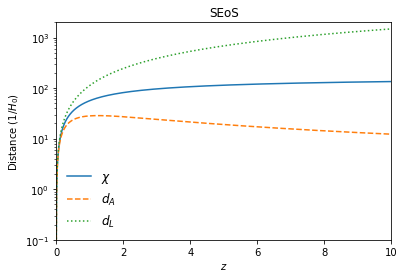

In [129]:
plot(seosseos[:,0],seosseos[:,4]/H0seos, label=r'$\chi$')
plot(seosseos[:,0],seosseos[:,5]/H0seos, ls='--', label=r'$d_A$')
plot(seosseos[:,0],seosseos[:,6]/H0seos, ls=':',label=r'$d_L$')
title(r'SEoS')
legend(loc='best', frameon=False, prop={'size':12})
ylabel(r'Distance $(1/H_0)$')
xlabel(r'$z$')
ylim(0.1,2000)
xlim(0,10)
#xscale('log')
yscale('log')